<a href="https://colab.research.google.com/github/nvpraneeth/dcp/blob/master/CapStone_TicketClassification_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIML Online Capstone - AUTOMATIC TICKET ASSIGNMENT

###The Real Problem

One of the key activities of any IT function is to “Keep the lights on” to ensure there is no impact to the
Business operations. IT leverages Incident Management process to achieve the
above Objective. An incident is something that is unplanned interruption to an IT service or
reduction in the quality of an IT service that affects the Users and the Business. The main goal
of Incident Management process is to provide a quick fix / workarounds or solutions that resolves the
interruption and restores the service to its full capacity to ensure no business impact. In most of the
organizations, incidents are created by various Business and IT Users, End Users/ Vendors if they have
access to ticketing systems, and from the integrated monitoring systems and tools. Assigning the
incidents to the appropriate person or unit in the support team has critical importance to provide
improved user satisfaction while ensuring better allocation of support resources. The assignment of
incidents to appropriate IT groups is still a manual process in many of the IT organizations. Manual
assignment of incidents is time consuming and requires human efforts. There may be mistakes due to
human errors and resource consumption is carried out ineffectively because of
the misaddressing. On the other hand, manual assignment increases the response and resolution times
which result in user satisfaction deterioration / poor customer service.

### Business Domain Value

In the support process, incoming incidents are analyzed and assessed by organization’s support teams to
fulfill the request. In many organizations, better allocation and effective usage of the valuable support
resources will directly result in substantial cost savings.
Currently the incidents are created by various stakeholders (Business Users, IT Users and Monitoring
Tools) within IT Service Management Tool and are assigned to Service Desk teams (L1 / L2 teams). This
team will review the incidents for right ticket categorization, priorities and then carry out initial
diagnosis to see if they can resolve. Around ~54% of the incidents are resolved by L1 / L2 teams. Incase
L1 / L2 is unable to resolve, they will then escalate / assign the tickets to Functional teams from
Applications and Infrastructure (L3 teams). Some portions of incidents are directly assigned to L3 teams
by either Monitoring tools or Callers / Requestors. L3 teams will carry out detailed diagnosis and resolve
the incidents. Around ~56% of incidents are resolved by Functional / L3 teams. Incase if vendor support
is needed, they will reach out for their support towards incident closure.
L1 / L2 needs to spend time reviewing Standard Operating Procedures (SOPs) before assigning to
Functional teams (Minimum ~25-30% of incidents needs to be reviewed for SOPs before ticket
assignment). 15 min is being spent for SOP review for each incident. Minimum of ~1 FTE effort needed
only for incident assignment to L3 teams.

During the process of incident assignments by L1 / L2 teams to functional groups, there were multiple
instances of incidents getting assigned to wrong functional groups. Around ~25% of Incidents are
wrongly assigned to functional teams. Additional effort needed for Functional teams to re-assign to right
functional groups. During this process, some of the incidents are in queue and not addressed timely
resulting in poor customer service.
Guided by powerful AI techniques that can classify incidents to right functional groups can help
organizations to reduce the resolving time of the issue and can focus on more productive tasks.

### End Goal

The goal is to build a classifier that can classify the tickets by analyzing text.

### Milestones. 

#### Pre-Processing, Data Visualization and EDA
- Exploring the given Data files
- Understanding the structure of data
- Missing points in data
- Finding inconsistencies in the data
- Visualizing different patterns
- Visualizing different text features
- Dealing with missing values
- Text preprocessing
- Creating word vocabulary from the corpus of report text data
- Creating tokens as required

####Model Building
- Building a model architecture which can classify.
- Trying different model architectures by researching state of the art for similar tasks.
- Train the model
- To deal with large training time, save the weights so that you can use them when training the
model for the second time without starting from scratch.

####Test the Model, Fine-tuning and Repeat
- Test the model and report as per evaluation metrics
- Try different models
- Try different evaluation metrics
- Set different hyper parameters, by trying different optimizers, loss functions, epochs, learning
rate, batch size, checkpointing, early stopping etc..for these models to fine-tune them
- Report evaluation metrics for these models along with your observation on how changing
different hyper parameters leads to change in the final evaluation metric.

In [1]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


### Import the necessary Libraries

In [ ]:
import os
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import re


### Load the data set

In [ ]:
ls -l "/content/drive/MyDrive"

total 3841237
-rw------- 1 root root   3263740 Nov 26  2018  00000PORTRAIT_00000_BURST20181125081729543.jpg
-rw------- 1 root root   5277331 Nov 26  2018  00100dPORTRAIT_00100_BURST20181125081729543_COVER.jpg
drwx------ 2 root root      4096 Mar  5  2017 '05032017 nlr fn'/
-rw------- 1 root root       151 Dec  1  2009 '0 master invt plan.gsheet'
-rw------- 1 root root    139520 Jun  1 14:00  1219157141_YNYC0592.pdf
-rw------- 1 root root     23392 Jun 15  2015  13498.pdf
-rw------- 1 root root     82073 Jul 27  2014  14043044494_AITxxxxx8P_A1.zip
-rw------- 1 root root     56580 Nov 23  2014  14099354113-AITxxxxx8P-G4.zip
-rw------- 1 root root     28420 Jun  6 14:07  1622982846665DP052124014668.pdf
-rw------- 1 root root    593227 Oct  2  2020  2016-Women-in-Law-Hackathon-Results-Report-All-Ideas-Winning-Teams-Updated-August-2016.pdf
-rw------- 1 root root  15436658 Oct  4  2019  2019_FRM_Candidate_Guide.pdf
-rw------- 1 root root   3833978 Jun  1  2019 '2019FRML2SchweserNotesBook3 (1

In [ ]:
ticket_data=pd.read_excel('/content/drive/MyDrive/data/input_data.xlsx')

FileNotFoundError: ignored

#### Checking the first 5 and last 5 records from the dataset

In [ ]:
ticket_data.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [ ]:
ticket_data.tail()

,Short description,Description,Caller,Assignment group
8495,emails not coming in from zz mail,\n\nreceived from: avglmrts.vhqmtiua@gmail.com...,avglmrts vhqmtiua,GRP_29
8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0
8497,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0
8498,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62
8499,an mehreren pc`s lassen sich verschiedene prgr...,an mehreren pc`s lassen sich verschiedene prgr...,kqvbrspl jyzoklfx,GRP_49


In [ ]:
#ticket_data[ticket_data['Short description']=='password reset']

#### Observation
 In the dataset provided , we have data coming in from multiple channels , like email , extract from any of the ticketing system , alerts of job failure , outage questionaire etc. Since we have data from multiple sources, we need to extract the relevant information from the short and long descriptions of the ticket.

#### Shape of the data

In [ ]:
ticket_data.shape

(8500, 4)

The dataset provided has 8500 rows and 4 columns

### Check the DataFrame info

In [ ]:
ticket_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


- The dataset comprises of 8500 rows and 4 columns
- All the columns are of Object data type and contain mainly textual information
- There are missing values in the dataset in the short description and description columns


#### Checking the presence of null values

In [ ]:
ticket_data.isna().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

- There are 8 records missing in the Short description and 1 record missing in the Description field

#### Viewing the missing records

Viewing the missing records in Short description column

In [ ]:
ticket_data[ticket_data['Short description'].isna()]

,Short description,Description,Caller,Assignment group
2604,NaN,\n\nreceived from: ohdrnswl.rezuibdt@gmail.com...,ohdrnswl rezuibdt,GRP_34
3383,NaN,\n-connected to the user system using teamview...,qftpazns fxpnytmk,GRP_0
3906,NaN,-user unable tologin to vpn.\n-connected to t...,awpcmsey ctdiuqwe,GRP_0
3910,NaN,-user unable tologin to vpn.\n-connected to t...,rhwsmefo tvphyura,GRP_0
3915,NaN,-user unable tologin to vpn.\n-connected to t...,hxripljo efzounig,GRP_0
3921,NaN,-user unable tologin to vpn.\n-connected to t...,cziadygo veiosxby,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...,wvqgbdhm fwchqjor,GRP_0
4341,NaN,\n\nreceived from: eqmuniov.ehxkcbgj@gmail.com...,eqmuniov ehxkcbgj,GRP_0


Viewing the missing values in Description column

In [ ]:
ticket_data[ticket_data['Description'].isna()]

,Short description,Description,Caller,Assignment group
4395,i am locked out of skype,NaN,viyglzfo ajtfzpkb,GRP_0


#### Checking the statistical summary of the dataset

In [ ]:
ticket_data.describe()

,Short description,Description,Caller,Assignment group
count,8492,8499,8500,8500
unique,7481,7814,2950,74
top,password reset,the,bpctwhsn kzqsbmtp,GRP_0
freq,38,56,810,3976


- We can observe that the top keywords in _**Short description**_ is _**password**_ reset 
- Top keyword present in description is _**the**_
- The person _**bpctwhsn kzqsbmtp**_ has placed the most number of support tickets
- Most of the tickets (3976) are assigned to _**GRP_0**_ in the provided dataset

#### Check the  tickets that have only "the" in description column

In [ ]:
ticket_data[ticket_data['Description']=='the'].shape[0]

56

In [ ]:
ticket_data[ticket_data['Description']=='the'].head(10)

,Short description,Description,Caller,Assignment group
1049,reset passwords for soldfnbq uhnbsvqd using pa...,the,soldfnbq uhnbsvqd,GRP_17
1054,reset passwords for fygrwuna gomcekzi using pa...,the,fygrwuna gomcekzi,GRP_17
1144,reset passwords for wvdxnkhf jirecvta using pa...,the,wvdxnkhf jirecvta,GRP_17
1184,reset passwords for pxvjczdt kizsjfpq using pa...,the,pxvjczdt kizsjfpq,GRP_17
1292,reset passwords for cubdsrml znewqgop using pa...,the,cubdsrml znewqgop,GRP_17
1476,reset passwords for bnoupaki cpeioxdz using pa...,the,bnoupaki cpeioxdz,GRP_17
1558,reset passwords for usa feathers using passwor...,the,lmqysdec ljvbnpqw,GRP_17
1693,reset passwords for eglavnhx uprodleq using pa...,the,eglavnhx uprodleq,GRP_17
1834,reset passwords for hybiaxlk lawptzir using pa...,the,hybiaxlk lawptzir,GRP_17
1850,reset passwords for fylrosuk kedgmiul using pa...,the,fylrosuk kedgmiul,GRP_17


Taking a backup of the orginal dataframe , before making any modifications to the data

In [ ]:
ticket_data_bkp = ticket_data.copy()

Handling the Description column that contains only "the"

There are 56 records in the dataset that has description as "the".
The word "the" alone in the description doesn't make any sense, we will replace these with np.NaN and will handle those later

In [ ]:
ticket_data['Description'] = ticket_data['Description'].replace('the', np.NaN)

#### Checking for duplicate values

In [ ]:
len(ticket_data[ticket_data.duplicated()])

84

We can see that there are 84 records that are duplicated in the dataset provided

#### Handling Duplicate Values

In [ ]:
ticket_data.drop_duplicates(keep='first', inplace=True)

In [ ]:
ticket_data.shape

(8416, 4)

In [ ]:
ticket_data.reset_index(drop=True,inplace=True)

### Handling Null Values

We had some missing records in Short Description and Description columns. Also we have marked 56 records as NaN , as it had only the word "the" in the description column.

In [ ]:
ticket_data.fillna(str(), inplace=True)

#### Checking for null values again

In [ ]:
ticket_data[pd.isnull(ticket_data).any(axis=1)]

,Short description,Description,Caller,Assignment group


In [ ]:
ticket_data.isna().sum()

Short description    0
Description          0
Caller               0
Assignment group     0
dtype: int64

#### Comments
- We have various ways of treating the NULL/Missing values in the dataset such as
  - Replacing them with empty string
  - Replacing them with some default values
  - Duplicating the Short description and Description values wherever one of them is Null
  - Dropping the records with null/missing values completely.
-We're not choosing to drop any record as we don't want to loose any information. And as we're going to concatenate the Short description and Description columns for each record while feeding them into different models, we neither want to pollute the data by introducing any default values nor bias it by duplicating the description colomns.
- Hence our NULL/Missing value treatment replaces the NaN cells with just empty string.

#### Fix the encoding issues in short description and description fields

Mojibake is the garbled text that is the result of text being decoded using an unintended character encoding. The result is a systematic replacement of symbols with completely unrelated ones, often from a different writing system.
This display may include the generic replacement character ("�") in places where the binary representation is considered invalid. A replacement can also involve multiple consecutive symbols, as viewed in one encoding, when the same binary code constitutes one symbol in the other encoding. This is either because of differing constant length encoding (as in Asian 16-bit encodings vs European 8-bit encodings), or the use of variable length encodings (notably UTF-8 and UTF-16). Few such Mojibakes are ¶, ç, å, €, æ, œ, º, ‡, ¼, ¥ etc.
As we're dealing with Natural Language and the source of the data is unknown to us, let's run the encoding check to figure out if the dataset is Mojibake impacted.  

The library **ftfy (Fixes Text For You)** has a greater ability to detect, fix and deal with such Mojibakes. It fixes Unicode that’s broken in various ways. The goal of ftfy is to take in bad Unicode and output good Unicode.  

**Installation:**
**using pypi:** _**!pip install ftfy**_  

**using conda:** _**conda install -c conda-forge ftfy**_

In [ ]:
! pip install ftfy

In [ ]:
import ftfy

In [ ]:
def detect_encoding_issues(text):
  if not ftfy.badness.sequence_weirdness(text):
    return True
  else:
    return False

ftfy.badness.sequence_weirdness() determines how frequently unexpected characters or sequences of characters appear in a text. This metric is used to determine whether or not text should be re-decoded.

#### Identifying the rows that has encoding issues or Mojibake impact

In [ ]:
encoding_issue_rows=ticket_data[~ticket_data.iloc[:,:-1].applymap(detect_encoding_issues).all(1)].index

In [ ]:
ticket_data[ticket_data.index.isin(encoding_issue_rows)]

,Short description,Description,Caller,Assignment group
98,password expiry tomorrow,\n\nreceived from: ecprjbod.litmjwsy@gmail.com...,ecprjbod litmjwsy,GRP_0
115,server issues,\n\nreceived from: bgqpotek.cuxakvml@gmail.com...,bgqpotek cuxakvml,GRP_0
123,mobile device activation,"from: tvcdfqgp nrbcqwgj \nsent: friday, octobe...",tvcdfqgp nrbcqwgj,GRP_0
161,access to bex,\n\nreceived from: yfqoaepn.xnezhsit@gmail.com...,yfqoaepn xnezhsit,GRP_0
163,æ’¤å›ž: ticket_no1564867 -- comments added,\n\nreceived from: abcdri@company.com\n\nwindy...,tycludks cjofwigv,GRP_0
...,...,...,...,...
8386,please review your recent ticketing_tool ticke...,"from: mikhghytr wafglhdrhjop \nsent: thursday,...",azxhejvq fyemlavd,GRP_16
8387,ç”µè„‘å¼€æœºå¼€ä¸å‡ºæ¥,to å°è´ºï¼Œæ—©ä¸Šç”µè„‘å¼€æœºå¼€ä¸å‡ºæ¥,xqyjztnm onfusvlz,GRP_30
8396,customer group enhanced field,\n\nreceived from: nlearzwi.ukdzstwi@gmail.com...,nlearzwi ukdzstwi,GRP_9
8414,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62


There are 850 rows that has mojibake impact

Taking an sample record that has encoding issues

In [ ]:
ticket_data['Description'][8387]

'to å°\x8fè´ºï¼Œæ—©ä¸Šç”µè„‘å¼€æœºå¼€ä¸\x8då‡ºæ\x9d¥'

Applying fix_text on the sample record

In [ ]:
ftfy.fix_text(ticket_data['Description'][8387])

'to 小贺,早上电脑开机开不出来'

We can observe that the encoding issue is fixed and the encoded text is in readable format . Appears to be chineese characters. So we can infer that the data provided is multi lingual

#### Fixing the encoding issue for Short Description and Description fields 

In [ ]:
ticket_data['Short description'] = ticket_data['Short description'].apply(ftfy.fix_text)
ticket_data['Description'] = ticket_data['Description'].apply(ftfy.fix_text)

#### Verifying whether the data is properly encoded

In [ ]:
ticket_data[ticket_data.index.isin(encoding_issue_rows)]

,Short description,Description,Caller,Assignment group
98,password expiry tomorrow,\n\nreceived from: ecprjbod.litmjwsy@gmail.com...,ecprjbod litmjwsy,GRP_0
115,server issues,\n\nreceived from: bgqpotek.cuxakvml@gmail.com...,bgqpotek cuxakvml,GRP_0
123,mobile device activation,"from: tvcdfqgp nrbcqwgj \nsent: friday, octobe...",tvcdfqgp nrbcqwgj,GRP_0
161,access to bex,\n\nreceived from: yfqoaepn.xnezhsit@gmail.com...,yfqoaepn xnezhsit,GRP_0
163,撤回: ticket_no1564867 -- comments added,\n\nreceived from: abcdri@company.com\n\nwindy...,tycludks cjofwigv,GRP_0
...,...,...,...,...
8386,please review your recent ticketing_tool ticke...,"from: mikhghytr wafglhdrhjop \nsent: thursday,...",azxhejvq fyemlavd,GRP_16
8387,电脑开机开不出来,"to 小贺,早上电脑开机开不出来",xqyjztnm onfusvlz,GRP_30
8396,customer group enhanced field,\n\nreceived from: nlearzwi.ukdzstwi@gmail.com...,nlearzwi ukdzstwi,GRP_9
8414,machine não está funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62


Fixed encoding issues 

In [ ]:
ticket_data['Description'][21]

'\n\nreceived from: ugephfta.hrbqkvij@gmail.com\n\nhello helpdesk\n\ni am not able to connect vpn from home office. couple f hours ago i was connected, now it is not working anymore. getting a message that my session expired but if i click on the link, nothing happens.\n\n[cid:image001.jpg@01d233aa.3f618be0]\n\n*********************\n\nneed help with your dynamics crm?\nclick here<\n\nchat with a live agent regarding your dynamics crm questions now! click here<\n\nbest '

We can also see that the fix_text method also replaced the line endings to \n.

Applying some basic text preprocessing 

In [ ]:
def basic_text_preprocessing(text):
  text = re.sub(r"\n",' ',text)
  text = re.sub(r"\[cid:.*?\]",'', text) 
  text = re.sub(r"([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-_]+\.[a-zA-Z0-9-.]+)",'', text)
  text = re.sub(r"received from:",'', text)
  text = text.strip()
  return text

Checking whether the preprocessing works, by applying it to a record

In [ ]:
basic_text_preprocessing(ticket_data['Description'][21])
#ticket_data.replace({'\n': ' '}, regex=True,inplace=True)

'hello helpdesk  i am not able to connect vpn from home office. couple f hours ago i was connected, now it is not working anymore. getting a message that my session expired but if i click on the link, nothing happens.    *********************  need help with your dynamics crm? click here<  chat with a live agent regarding your dynamics crm questions now! click here<  best'

In [ ]:
ticket_data_b_preprocess = ticket_data.copy()

Applying the basic text preprocessing to the Description and Short Description fields

In [ ]:
ticket_data['Short description'] = ticket_data['Short description'].apply(basic_text_preprocessing)
ticket_data['Description'] = ticket_data['Description'].apply(basic_text_preprocessing)

Checking a Sample record after applying the basic preprocessing 

In [ ]:
ticket_data['Description'][21]

'hello helpdesk  i am not able to connect vpn from home office. couple f hours ago i was connected, now it is not working anymore. getting a message that my session expired but if i click on the link, nothing happens.    *********************  need help with your dynamics crm? click here<  chat with a live agent regarding your dynamics crm questions now! click here<  best'

In [ ]:
ticket_data['Description'][8414]

'i am unable to access the machine utilities to finish the drawers adjustment settings. is no network..'

In [ ]:
ticket_data_basic_preprocessed = ticket_data.copy()

#### Creating a new column , by combining the Short Description and description columns 

From the data set we have seen that there are few records that have either short description or Description columns with missing values. So we will combine these 2 columns and create a new column . In some cases the short description and long description are the same ,in these cases we will populate the new column with either short description or description column

In [ ]:
ticket_data["Combined_Description"] = np.NaN
unidentical_data_index = ticket_data[ticket_data.apply(lambda x: x['Description'] != x['Short description'], axis = 1)].index
for index in unidentical_data_index:
  ticket_data.loc[index,'Combined_Description'] =  ticket_data.loc[index,'Short description'] +". "+  str(ticket_data.loc[index,'Description'])
ticket_data["Combined_Description"] = ticket_data["Combined_Description"].fillna(value =ticket_data['Short description'])

Checking few records after the new column creation

In [ ]:
ticket_data.head(5)

,Short description,Description,Caller,Assignment group,Combined_Description
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue. -verified user details.(employee#...
1,outlook,"hello team, my meetings/skype meetings etc ar...",hmjdrvpb komuaywn,GRP_0,"outlook. hello team, my meetings/skype meetin..."
2,cant log in to vpn,hi i cannot log on to vpn best,eylqgodm ybqkwiam,GRP_0,cant log in to vpn. hi i cannot log on to vpn...
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error


#### Language Detection

As we have noticed that the data provided is multi lingual , we will Detect the languages present in the dataset. 

We can have multiple ways to identify the language 
- Google Translate Language detection
- langdetect
- fast text
- using nltk

All these Libraries had issues when the text to translate contains mixed langauages eg: english text between the non english text. 

On further analysis understood that the google cloud translation API provides better results in this scenario.

So we have used the Google translate API for language detection and translation


Calling the Google translate API

In [ ]:
import getpass
APIKEY = getpass.getpass()

··········


Running the Google translate API

In [ ]:
from googleapiclient.discovery import build
service = build('translate', 'v2', developerKey=APIKEY)

Detect Language

In [ ]:
ticket_data['lang_detected'] =  'en'
for index, row in ticket_data.iterrows():
  cov_rows = '"""'+str(row['Combined_Description'])+'"""'
  outputs = service.detections().list(q=cov_rows).execute()
  for  output in outputs['detections']:
    lang = output[0]['language']
    ticket_data.loc[index,'lang_detected'] = lang

In [ ]:
ticket_data.head(5)

,Short description,Description,Caller,Assignment group,Combined_Description,lang_detected
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue. -verified user details.(employee#...,en
1,outlook,"hello team, my meetings/skype meetings etc ar...",hmjdrvpb komuaywn,GRP_0,"outlook. hello team, my meetings/skype meetin...",en
2,cant log in to vpn,hi i cannot log on to vpn best,eylqgodm ybqkwiam,GRP_0,cant log in to vpn. hi i cannot log on to vpn...,en
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page,en
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error,en


Saving the dataframe with languages detected to a CSV for future use

In [ ]:
ticket_data.to_csv('/content/drive/MyDrive/Projects/Capstone/data/processed/input_lang_detected.csv')

Listing the languages present in the dataset

In [ ]:
ticket_data['lang_detected'].unique()

array(['en', 'es', 'zh-CN', 'de', 'pt', 'cy', 'ru', 'fr', 'zu', 'zh-TW',
       'sv', 'af', 'ro', 'lb', 'gu', 'pl', 'ja', 'sl', 'tr', 'da', 'tl',
       'hu', 'ar', 'gl', 'el', 'ku'], dtype=object)

In [ ]:
ticket_data['Combined_Description'][8387]

'电脑开机开不出来. to 小贺,早上电脑开机开不出来'

In [ ]:
ticket_data['lang_detected'][8387]

'zh-CN'

Checking the language distribution of the data set

In [ ]:
ticket_data['lang_detected'].value_counts()

en       7531
de        705
zh-CN     120
pt         16
pl          5
lb          5
ja          4
es          4
ro          3
tl          3
da          2
el          2
hu          2
zh-TW       2
cy          1
sl          1
fr          1
zu          1
tr          1
sv          1
af          1
ku          1
gl          1
ru          1
ar          1
gu          1
Name: lang_detected, dtype: int64

Visualizing the language distribution

For visualization we have used holoviews. 
HoloViews is an open-source Python 2 and 3 library for data analysis and visualization. Python already has excellent tools like numpy, pandas, and xarray for data processing, and bokeh and matplotlib for plotting, so why yet another library?

HoloViews helps us understand our data better, by letting us work seamlessly with both the data and its graphical representation.

HoloViews focuses on bundling our data together with the appropriate metadata to support both analysis and visualization, making our raw data and its visualization equally accessible at all times. 

With HoloViews, instead of building a plot using direct calls to a plotting library, we first describe our data with a small amount of crucial semantic information required to make it visualizable, then we specify additional metadata as needed to determine more detailed aspects of our visualization. This approach provides immediate, automatic visualization that can be effortlessly requested at any time as our data evolves, rendered automatically by one of the supported plotting libraries (such as Bokeh, Plotly or Matplotlib).


In [ ]:
import holoviews as hv
from holoviews import opts
from bokeh.themes.theme import Theme

theme = Theme(
    json={
    'attrs' : {
        'Figure' : {
            'background_fill_color': '#2F2F2F',
            'border_fill_color': '#2F2F2F',
            'outline_line_color': '#444444',
        },
        'Grid': {
            'grid_line_dash': [6, 4],
            'grid_line_alpha': .3,
        },

        'Axis': {
            'major_label_text_color': 'white',
            'axis_label_text_color': 'white',
            'major_tick_line_color': 'white',
            'minor_tick_line_color': 'white',
            'axis_line_color': "white"
        },
        'Title':{
            'text_color': 'white'
        }
    }
})

In [ ]:
hv.renderer('bokeh').theme = theme

Visualizing the Language distribution

In [ ]:
lang_dist = ticket_data['lang_detected'].value_counts()
hv.extension('bokeh')
hv.Bars(lang_dist).opts(title="Distribution of language", color="#33e848", xlabel="Languages", ylabel="Count")\
                .opts(opts.Bars(width=800, height=300,tools=['hover'],show_grid=True))

Pie chart to visualize the language distribution

In [ ]:
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import plotly.graph_objs as go
from plotly import tools
trace = go.Pie(labels = ticket_data['lang_detected'].value_counts().index.values,values = ticket_data['lang_detected'].value_counts(),\
               hoverinfo = 'label+percent+value+name',hole =.5,textinfo="text")
layout = go.Layout(height = 400,width = 900, autosize = True, title = 'Distribution of languages',showlegend=True)
fig = go.Figure(data = trace, layout = layout)
iplot(fig, show_link = False)

Translate the non english text to english

In [ ]:
ticket_data['translated_description'] =  ''
translated_count = 0
for index, row in ticket_data.iterrows():
  cov_rows = str(row['Combined_Description'])
  word_length = len(cov_rows.strip().split())
  if row['lang_detected'] == 'en':
    ticket_data.loc[index,'translated_description'] = row['Combined_Description']
  else:
    outputs = service.translations().list(source=row['lang_detected'], target='en', q=cov_rows).execute()
    for  output in outputs['translations']:
      translated_txt = output['translatedText']
      ticket_data.loc[index,'translated_description'] = translated_txt
      translated_count+=1
print("Records Translated = {}".format(translated_count))

Records Translated = 885


Verifying the number of translated records by cross checking against the dataframe

In [ ]:
ticket_data[ticket_data['lang_detected'] !='en'].shape

(885, 7)

Exporting the translated text to a CSV for future use

In [ ]:
ticket_data.to_csv('/content/drive/MyDrive/Projects/Capstone/data/processed/input_lang_translated.csv')

Checking few of the translated records

In [ ]:
ticket_data[ticket_data['lang_detected'] !='en'].head()

,Short description,Description,Caller,Assignment group,Combined_Description,lang_detected,translated_description
123,mobile device activation,"from: tvcdfqgp nrbcqwgj sent: friday, october...",tvcdfqgp nrbcqwgj,GRP_0,mobile device activation. from: tvcdfqgp nrbcq...,es,mobile device activation. from: tvcdfqgp nrbcq...
163,撤回: ticket_no1564867 -- comments added,"windy shi 将撤回邮件""ticket_no1564867 -- comments a...",tycludks cjofwigv,GRP_0,撤回: ticket_no1564867 -- comments added. windy ...,zh-CN,Withdraw: ticket_no1564867 - comments added. W...
185,青岛兴合机电shipment notification邮箱设置,"from: sent: friday, october 28, 2016 7:20 am...",yafxlpwi lhxvatkb,GRP_18,青岛兴合机电shipment notification邮箱设置. from: sent:...,zh-CN,Qingdao Xinghe Electromechanical shipment noti...
221,support für fa.gstry \arexjftu ohxdwngl,support für fa.konnica \arexjftu ohxdwngl,arexjftu ohxdwngl,GRP_24,support für fa.gstry \arexjftu ohxdwngl. suppo...,de,support for fa.gstry \ arexjftu ohxdwngl. supp...
222,probleme mit bluescreen .,"hallo , es ist erneut passiert. der pc hat si...",vrfpyjwi nzhvgqiw,GRP_24,"probleme mit bluescreen .. hallo , es ist ern...",de,"problems with bluescreen .. hello, it happened..."


In [ ]:
ticket_data['Combined_Description'][185]

'青岛兴合机电shipment notification邮箱设置. from:   sent: friday, october 28, 2016 7:20 am to: nwfodmhc exurcwkm subject: re: 青岛兴合机电shipment notification邮箱设置  dear, pls help to update customer 4563729890 shipment notification email address :      b.'

In [ ]:
ticket_data['translated_description'][185]

'Qingdao Xinghe Electromechanical shipment notification mailbox settings. from: sent: friday, october 28, 2016 7:20 am to: nwfodmhc exurcwkm subject: re: Qingdao Xinghe Electromechanical shipment notification mailbox settings dear, pls help to update customer 4563729890 shipment notification email address: b.'

In [ ]:
ticket_data['translated_description'][75]

'job hr_payroll_na_u2 failed in job_scheduler at: 10/30/2016 23:00:00'

Making a copy of the translated data

In [ ]:
ticket_data_after_translation = ticket_data.copy()

Pickle the translated dataframe for future use

In [ ]:
import pickle

In [ ]:
with open('/content/drive/MyDrive/Projects/Capstone/data/pickles/translated_ticket.pkl','wb') as f:
    pickle.dump(ticket_data, f, pickle.HIGHEST_PROTOCOL)

#### Some more preprocessing after all the text is translated to english


Some of the description fields have the caller names along with the data. We can remove the caller names from the translated combined description

In [ ]:
ticket_data['Caller'].value_counts()

bpctwhsn kzqsbmtp    788
ZkBogxib QsEJzdZO    151
fumkcsji sarmtlhy    128
rbozivdq gmlhrtvp     72
rkupnshb gsmzfojw     71
                    ... 
qfetblky iwflmhuc      1
xahuklgm dqvkfjlb      1
spamkgnx nbixueyw      1
bioanvcz zgfiahyo      1
olzsuean sojwhbrv      1
Name: Caller, Length: 2950, dtype: int64

getting the unique caller names from the dataset

In [ ]:
#caller_names = pd.Series({'Caller': ticket_data_test['Caller'].unique() }).values
caller_names = ticket_data['Caller'].unique()

In [ ]:
ticket_data['Caller'].unique().shape

(2950,)

We can see that 2950 unique caller names are present in the dataset

Creating a new column for all the data manipulation

In [ ]:
ticket_data['Updated_translation'] = ticket_data['translated_description'].copy()

In [ ]:
ticket_data.head()

,Short description,Description,Caller,Assignment group,Combined_Description,lang_detected,translated_description,Updated_translation
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue. -verified user details.(employee#...,en,login issue. -verified user details.(employee#...,login issue. -verified user details.(employee#...
1,outlook,"hello team, my meetings/skype meetings etc ar...",hmjdrvpb komuaywn,GRP_0,"outlook. hello team, my meetings/skype meetin...",en,"outlook. hello team, my meetings/skype meetin...","outlook. hello team, my meetings/skype meetin..."
2,cant log in to vpn,hi i cannot log on to vpn best,eylqgodm ybqkwiam,GRP_0,cant log in to vpn. hi i cannot log on to vpn...,en,cant log in to vpn. hi i cannot log on to vpn...,cant log in to vpn. hi i cannot log on to vpn...
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page,en,unable to access hr_tool page,unable to access hr_tool page
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error,en,skype error,skype error


Creating a Set with text to remove from the translated description

In [ ]:
text_to_remove = set(caller_names)

Adding Few more words that looks irrelevant for ticket classification

In [ ]:
text_to_remove = text_to_remove.union({'from:','sent:','to:','re:','fw:','subject:','good morning','good afternoon'})


Function to remove the words that needs to be removed

In [ ]:
def remove_text_from_desc(text_to_remove,description):
  cleaned_desc = description.replace(text_to_remove,"")
  return cleaned_desc

In [ ]:
display(ticket_data['Updated_translation'][382])
display(ticket_data['Caller'][382])

'engineering_tool upload issue. from: ufgkybsh ijswtdve  sent: tuesday, october 25, 2016 8:29 pm to: nwfodmhc exurcwkm subject: tgryds fw: engineering_tool upload issue  dear sir/mam,  please find below the screenshot of engineering_tool issue faced during upload.  please help me to resolve the same.'

'ufgkybsh ijswtdve'

In [ ]:
txt = remove_text_from_desc(ticket_data['Caller'][382],ticket_data['Updated_translation'][382])
print(txt)

engineering_tool upload issue. from:   sent: tuesday, october 25, 2016 8:29 pm to: nwfodmhc exurcwkm subject: tgryds fw: engineering_tool upload issue  dear sir/mam,  please find below the screenshot of engineering_tool issue faced during upload.  please help me to resolve the same.


In [ ]:
ticket_data_b4_txt_removal = ticket_data.copy()

### Remove the unwanted text from the combined description

In [ ]:
for index, rows in ticket_data.iterrows():
  data_to_fix = rows['translated_description']
  for x in text_to_remove:
    if x in rows['translated_description']:
      data_to_fix = remove_text_from_desc(x,data_to_fix)
      ticket_data.loc[index,'Updated_translation'] = data_to_fix

In [ ]:
display(ticket_data['Updated_translation'][382])

'engineering_tool upload issue.     tuesday, october 25, 2016 8:29 pm  nwfodmhc exurcwkm  tgryds  engineering_tool upload issue  dear sir/mam,  please find below the screenshot of engineering_tool issue faced during upload.  please help me to resolve the same.'

#### Saving the dataframe to csv and also pickle the file 

In [ ]:
ticket_data.to_csv('/content/drive/MyDrive/Projects/Capstone/data/processed/input_lang_tr_preprocessed.csv')

In [ ]:
with open('/content/drive/MyDrive/Projects/Capstone/data/pickles/tr_ticket_preprocessed.pkl','wb') as f:
    pickle.dump(ticket_data, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
ticket_data_v2_preprocess = ticket_data.copy()

In [ ]:
with open('/content/drive/MyDrive/Projects/Capstone/data/pickles/tr_ticket_preprocessed.pkl','rb') as f:
    ticket_data = pickle.load(f)

Function to preprocess text

This function removes the punctuations from the text except underscores ("\_"), removes all numeric values except the ones that has an underscore ("\_") prefix.
if more than 2 underscores are adjecent to each other  in a text replace those with empty string and remove the occurence of multiple spaces in the text

In [ ]:
def preprocess_text(text):
  text = text.lower()
  text = basic_text_preprocessing(text)
  text = re.sub(r"(?:{})|([^\w\s_]+)",' ',text)
  text = re.sub(r"(?<!_)(?<!\d)\d+", '',text)
  #text = re.sub(r"(\s\d+)",' ',text)
  text = re.sub('__+', '',text)
  text = re.sub(' +', ' ',text)
  return text

Apply preprocessing to the Updated_translation column

In [ ]:
ticket_data['Updated_translation'] = ticket_data['Updated_translation'].apply(preprocess_text)

Checking few samples

In [ ]:
display(ticket_data['Updated_translation'][382])

'engineering_tool upload issue tuesday october pm nwfodmhc exurcwkm tgryds engineering_tool upload issue dear sir mam please find below the screenshot of engineering_tool issue faced during upload please help me to resolve the same '

In [ ]:
display(ticket_data['Updated_translation'][371])

'job job_2668 failed in job_scheduler at '

In [ ]:
ticket_data_b4_nltk = ticket_data.copy()

### Stop word removal

In [ ]:
import nltk
nltk.download('stopwords')  #downloading stopwords
nltk.download("punkt")  #downloading sentence tokenizer
nltk.download("wordnet") #downloading english dictionary corpus
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import RegexpTokenizer
from tqdm import tqdm

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Adding few additional words to stopwords.

On analyzing the description column we can see that there are multiple words that can be removed from the text like day of the week , month , some of the basic greetings etc. So we can add these words to the stopwords and during stop word removal we can remove these words as well


In [ ]:
x_stopwords = set(stopwords.words('english')).union(set(['sunday' , 'monday', 'tuesday', 'wednesday', 'thursday', \
                     'friday', 'saturday','january', 'february', 'march', 'april','may',\
                     'june' , 'july', 'august', 'september', 'october', 'november', 'december','regards','best','hello',\
                     'hi','hope',"am","pm",'regards','thanks','from','greeting','forward','reply',\
                     'will','please','see','help','able','etc','dear','sir/mam','sir','mam','madam','yes','na','would']))

#### Function to clean the text

The text is converted into lower case and then stop words will be removed , if we pass the value of remove_stopwords argument as True. By default the stopword removal is set as True , but if we want to ignore the stop words then we can pass the argument remove_stopwords=False

In [ ]:
def clean_text(text, remove_stopwords=True):
    cleaned_data=[]
    for sent in tqdm(text):
        sent =sent.lower()
        if remove_stopwords:
          words=[word for word in sent.split() if word not in x_stopwords]
        else:
          words=[word for word in sent.split()]
        cleaned_data.append(' '.join(words))
    return cleaned_data

Checking few records before applying the clean text

In [ ]:
ticket_data['Updated_translation'][371]

'job job_2668 failed in job_scheduler at '

In [ ]:
display(ticket_data['Updated_translation'][382])

'engineering_tool upload issue tuesday october pm nwfodmhc exurcwkm tgryds engineering_tool upload issue dear sir mam please find below the screenshot of engineering_tool issue faced during upload please help me to resolve the same '

In [ ]:
ticket_data_after_nltk= ticket_data.copy()

#### Lemmatization

Lemmatization is the process of grouping together the different inflected forms of a word so they can be analysed as a single item. Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meaning to one word.

In [ ]:
import spacy

In [ ]:
!python -m spacy download en_core_web_md

     |████████████████████████████████| 96.4 MB 1.2 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [ ]:
import en_core_web_sm
#nlp = spacy.load('en_core_web_md', disable=['parser', 'ner'])

In [ ]:
nlp = en_core_web_sm.load(disable=['parser', 'ner'])

Function to apply Lemmatization using spacy

In [ ]:
def lemmatizer(sentence):
    # Parse the sentence using the loaded 'en' model object `nlp`
    doc = nlp(sentence)
    return " ".join([token.lemma_ for token in doc if token.lemma_ !='-PRON-'])

In [ ]:
ticket_data['Updated_translation'][77]

'power outage uk al st and th ave sites hard down since at pm et on what type of outage network circuit xpower please specify what type of outage top cert site yes yes no na when did it start 4 pm et on scheduled maintenance power yno yes no na company power provider power scheduled maintenance network no yes no na company maint yes no provider maint ticket does site have a backup circuit yes yes no na backup circuit active na yes no na site contact notified phone email yes no na remote dial in na yes no na equipment reset na yes no na verified site working on backup circuit na yes no na vendor ticket global_telecom_1 verizon telecom_vendor_1 telecom_vendor_2 global_telecom_1 notified gsc yes no na cert started yes no na additional diagnostics'

In [ ]:
ticket_data['Updated_translation'][3407]

'set up write and read access to the folder m staebefertigung leitung hello please set up write and read authorization for user maerza on the folder m staebefertigung leitung thank you'

Applying Lemmatization

In [ ]:
ticket_data['Updated_translation'] = ticket_data['Updated_translation'].apply(lemmatizer)

In [ ]:
ticket_data_test_after_lemma = ticket_data.copy()

Applying stop word removal

In [ ]:
ticket_data['Updated_translation'] = clean_text(ticket_data['Updated_translation'],remove_stopwords=True)


100%|██████████| 8416/8416 [00:00<00:00, 136579.04it/s]


Checking few records

In [ ]:
ticket_data['Updated_translation'][382]

'engineering_tool upload issue nwfodmhc exurcwkm tgryds engineering_tool upload issue find screenshot engineering_tool issue face upload resolve'

In [ ]:
ticket_data['Updated_translation'][371]

'job job_2668 fail job_scheduler'

In [ ]:
ticket_data['Updated_translation'][77]

'power outage uk al st th ave site hard since et type outage network circuit xpower specify type outage top cert site start 4 et scheduled maintenance power yno company power provider power schedule maintenance network company maint provider maint ticket site backup circuit backup circuit active site contact notify phone email remote dial equipment reset verified site work backup circuit vendor ticket global_telecom_1 verizon telecom_vendor_1 telecom_vendor_2 global_telecom_1 notify gsc cert start additional diagnostic'

In [ ]:
ticket_data['Updated_translation'][3075]

'security incident internal outbreak port awyl source ip system name user name location sep sms status field sale user dsw event log event datum relate event event event summary internal outbreak udp occurrence count event count host connection information source ip source hostname awyl source port source mac address f c ab b destination hostname destination port connection directionality internal protocol udp device information device ip device name att apac asa company com log time utc action block cvss sco scwx event processing information sherlock rule sle inspector rule inspector event ontology event type agent event detail sep asa deny udp src inside dst outside access group acl_inside x x correlation_data sep dhcpd dhcpack f c ab b awyl via eth relay lease duration renew sep asa deny udp src inside dst outside access group acl_inside x x correlation_data sep dhcpd dhcpack f c ab b awyl via eth relay lease duration renew sep asa deny udp src inside dst outside access group acl_in

Saving a copy of the dataframe as a csv and also a a pickled file

In [ ]:
ticket_data_lemmatized = ticket_data.copy()

In [ ]:
ticket_data.to_csv('/content/drive/MyDrive/Projects/Capstone/data/processed/input_lang_tr_lemmatized.csv')

In [ ]:
with open('/content/drive/MyDrive/Projects/Capstone/data/pickles/tr_ticket_lemmatized.pkl','wb') as f:
    pickle.dump(ticket_data, f, pickle.HIGHEST_PROTOCOL)

### Exploratory Data Analysis

In [ ]:
with open('/content/drive/MyDrive/Projects/Capstone/data/pickles/tr_ticket_lemmatized.pkl','rb') as f:
    ticket_data = pickle.load(f)

Creating a dataframe with the Assignment group. , number of tickets assigned to each group and the percentage of tickets assigned to that group

In [ ]:
assignment_data = pd.DataFrame(ticket_data['Assignment group'].value_counts())
assignment_data.reset_index(inplace=True)
assignment_data.rename(columns={'index':'Assignment group','Assignment group':'Count'},inplace=True)
assignment_data['Percentage'] = assignment_data['Count'].apply(lambda x : x/(assignment_data['Count'].sum())*100)
assignment_data.head()

,Assignment group,Count,Percentage
0,GRP_0,3933,46.732414
1,GRP_8,645,7.663973
2,GRP_24,285,3.386407
3,GRP_12,257,3.053707
4,GRP_9,252,2.994297


Visualizing the distribution of data in Assignment groups

In [ ]:
ticket_classification = assignment_data.head(34)
#ticket_classification = ticket_data['Assignment group'].value_counts().head(40)
hv.extension('bokeh')
hv.Bars(ticket_classification).opts(title="Distribution of Assignment groups", color="#33e848", xlabel="Assignment groups", ylabel="Count")\
                .opts(opts.Bars(width=1000, height=400,tools=['hover'],show_grid=True,xrotation=45))

Visualizing the tickets that has less than 30 number of tickets assigned

In [ ]:
ticket_classification = assignment_data.tail(40)
hv.extension('bokeh')
hv.Bars(ticket_classification).opts(title="Distribution of Assignment groups", color="#2de0a5", xlabel="Assignment groups", ylabel="Count")\
                .opts(opts.Bars(width=1000, height=400,tools=['hover'],show_grid=True,xrotation=45))

Filtering the Assignment groups that has less than 30 records 

In [ ]:
others_group = ticket_data.groupby(['Assignment group']).filter(lambda x: len(x) <= 30)

In [ ]:
others_data = pd.DataFrame(others_group['Assignment group'].value_counts())
others_data.reset_index(inplace=True)
others_data.rename(columns={'index':'Assignment group','Assignment group':'Count'},inplace=True)
others_data['Percentage'] = others_data['Count'].apply(lambda x : x/(others_data['Count'].sum())*100)

In [ ]:
others_data_dist = others_data.tail(40)
hv.extension('bokeh')
hv.Bars(others_data_dist).opts(title="Distribution of Assignment groups with in the others category", color="#f5425a", xlabel="Assignment groups", ylabel="Count")\
                .opts(opts.Bars(width=1000, height=400,tools=['hover'],show_grid=True,xrotation=45))

- GRP_0 has the most tickets assigned (3933) - almost 46.73% of the tickets assigned
- GRP_8 has the next highest number of tickets assigned (645)- 7.66%
- There are 6 groups with just one ticket assigned

The target column is heavily imbalanced

### Analysis of caller field

In [ ]:
## checking the count of unique callers
ticket_data['Caller'].nunique()

2950

There are 2950 unique callers in the dataset

### Analysing the distribution of tickets raised by each caller

In [ ]:
tickets_by_caller = pd.DataFrame(ticket_data.groupby(['Caller']).size(), columns=['Count']).reset_index()
tickets_by_caller.sort_values(by='Count',ascending=False,inplace=True)

In [ ]:
tickets_by_caller

,Caller,Count
182,bpctwhsn kzqsbmtp,788
2,ZkBogxib QsEJzdZO,151
646,fumkcsji sarmtlhy,128
1902,rbozivdq gmlhrtvp,72
1945,rkupnshb gsmzfojw,71
...,...,...
783,hdqfgbei rnybhzve,1
786,hefiuwvo lcgadsef,1
787,hejsrtpz pxqwbulg,1
1837,qlurtxzs qalsvutw,1


Visualizing the number of tickets raised by each caller

In [ ]:
trace = go.Pie(labels = tickets_by_caller['Caller'],values = tickets_by_caller['Count'],\
               hoverinfo = 'label+percent+value+name',hole =.5,textinfo="text")
layout = go.Layout(height = 400,width = 900, autosize = True, title = 'Tickets raised by each caller',showlegend=True)
fig = go.Figure(data = trace, layout = layout)
iplot(fig, show_link = False)

bpctwhsn kzqsbmtp - is the caller that has raised most of the tickets.(788) (9.36%). 

There are few users who have raised just one ticket

Analyzing the callers and groups 

In [ ]:
top_n = 5
s = ticket_data['Caller'].groupby(ticket_data['Assignment group']).value_counts()
caller_grp = pd.DataFrame(s.groupby(level=0).nlargest(top_n).reset_index(level=0, drop=True))
caller_grp.head(15)

Caller
Assignment group Caller                   
GRP_0            fumkcsji sarmtlhy     126
                 rbozivdq gmlhrtvp      71
                 olckhmvx pcqobjnd      47
                 efbwiadp dicafxhv      45
                 mfeyouli ndobtzpw      13
GRP_1            bpctwhsn kzqsbmtp       6
                 jloygrwh acvztedi       4
                 jyoqwxhz clhxsoqy       3
                 spxqmiry zpwgoqju       3
                 kbnfxpsy gehxzayq       2
GRP_10           bpctwhsn kzqsbmtp      60
                 ihfkwzjd erbxoyqk       6
                 dizquolf hlykecxa       5
                 gnasmtvx cwxtsvkm       3
                 hlrmufzx qcdzierm       3

There are 2950 callers have been captured in the entire dataset

There are many callers that have raised tickets to differnet groups

We can say that the callers column will not have an impact on the Assignment group

#### Adding a column for word count 

In [ ]:
ticket_data.insert(5, 'word_count', ticket_data['Updated_translation'].apply(lambda x: len(str(x).split())))
ticket_data.head()

,Short description,Description,Caller,Assignment group,Combined_Description,word_count,lang_detected,translated_description,Updated_translation
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue. -verified user details.(employee#...,23,en,login issue. -verified user details.(employee#...,login issue verify user detail employee manage...
1,outlook,"hello team, my meetings/skype meetings etc ar...",hmjdrvpb komuaywn,GRP_0,"outlook. hello team, my meetings/skype meetin...",12,en,"outlook. hello team, my meetings/skype meetin...",outlook team meeting skype meeting appear outl...
2,cant log in to vpn,hi i cannot log on to vpn best,eylqgodm ybqkwiam,GRP_0,cant log in to vpn. hi i cannot log on to vpn...,4,en,cant log in to vpn. hi i cannot log on to vpn...,log vpn log vpn
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page,4,en,unable to access hr_tool page,unable access hr_tool page
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error,2,en,skype error,skype error


Checking the value counts for the word count

In [ ]:
ticket_data['word_count'].value_counts()

4      1401
3       902
2       419
5       391
8       388
       ... 
124       1
172       1
204       1
220       1
0         1
Name: word_count, Length: 173, dtype: int64

### Visualizing the word count distribution

In [ ]:
word_count_dist = pd.DataFrame(ticket_data['word_count'].value_counts(), columns=['word_count']).reset_index()
word_count_dist.rename(columns={'index':'word_count','word_count':'Count'},inplace=True)
hv.extension('bokeh')
hv.Bars(word_count_dist).opts(title="Distribution of Assignment groups with in the others category", color="#f5425a", xlabel="word_count", ylabel="Count")\
                .opts(opts.Bars(width=1000, height=400,tools=['hover'],show_grid=True,xrotation=90))

Most of the tickets has word count 4 (1401) , followed by word count 3 (902)

In [ ]:
ticket_data.drop(ticket_data[ticket_data['word_count']==0].index, inplace = True)

Checking word count by group

In [ ]:
wrd_count = ticket_data['word_count'].groupby(ticket_data['Assignment group']).value_counts()
wrd_grp = pd.DataFrame(wrd_count.groupby(level=0).nlargest(200).reset_index(level=0, drop=True))
wrd_grp

word_count
Assignment group word_count            
GRP_0            3                  741
                 4                  519
                 2                  323
                 5                  268
                 6                  214
...                                 ...
GRP_9            14                   1
                 11                   1
                 6                    1
                 2                    1
                 147                  1

[1595 rows x 1 columns]

Plotting Word cloud to see the prominent words 

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
def plot_word_cloud(corpus):
    wordcloud = WordCloud(width = 800, height = 400, 
                    background_color ='#ffffff', 
                    min_font_size = 10).generate(corpus)                        
    plt.figure(figsize = (15, 12), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()

Word cloud for the Updated_translation column (processed short description and description)

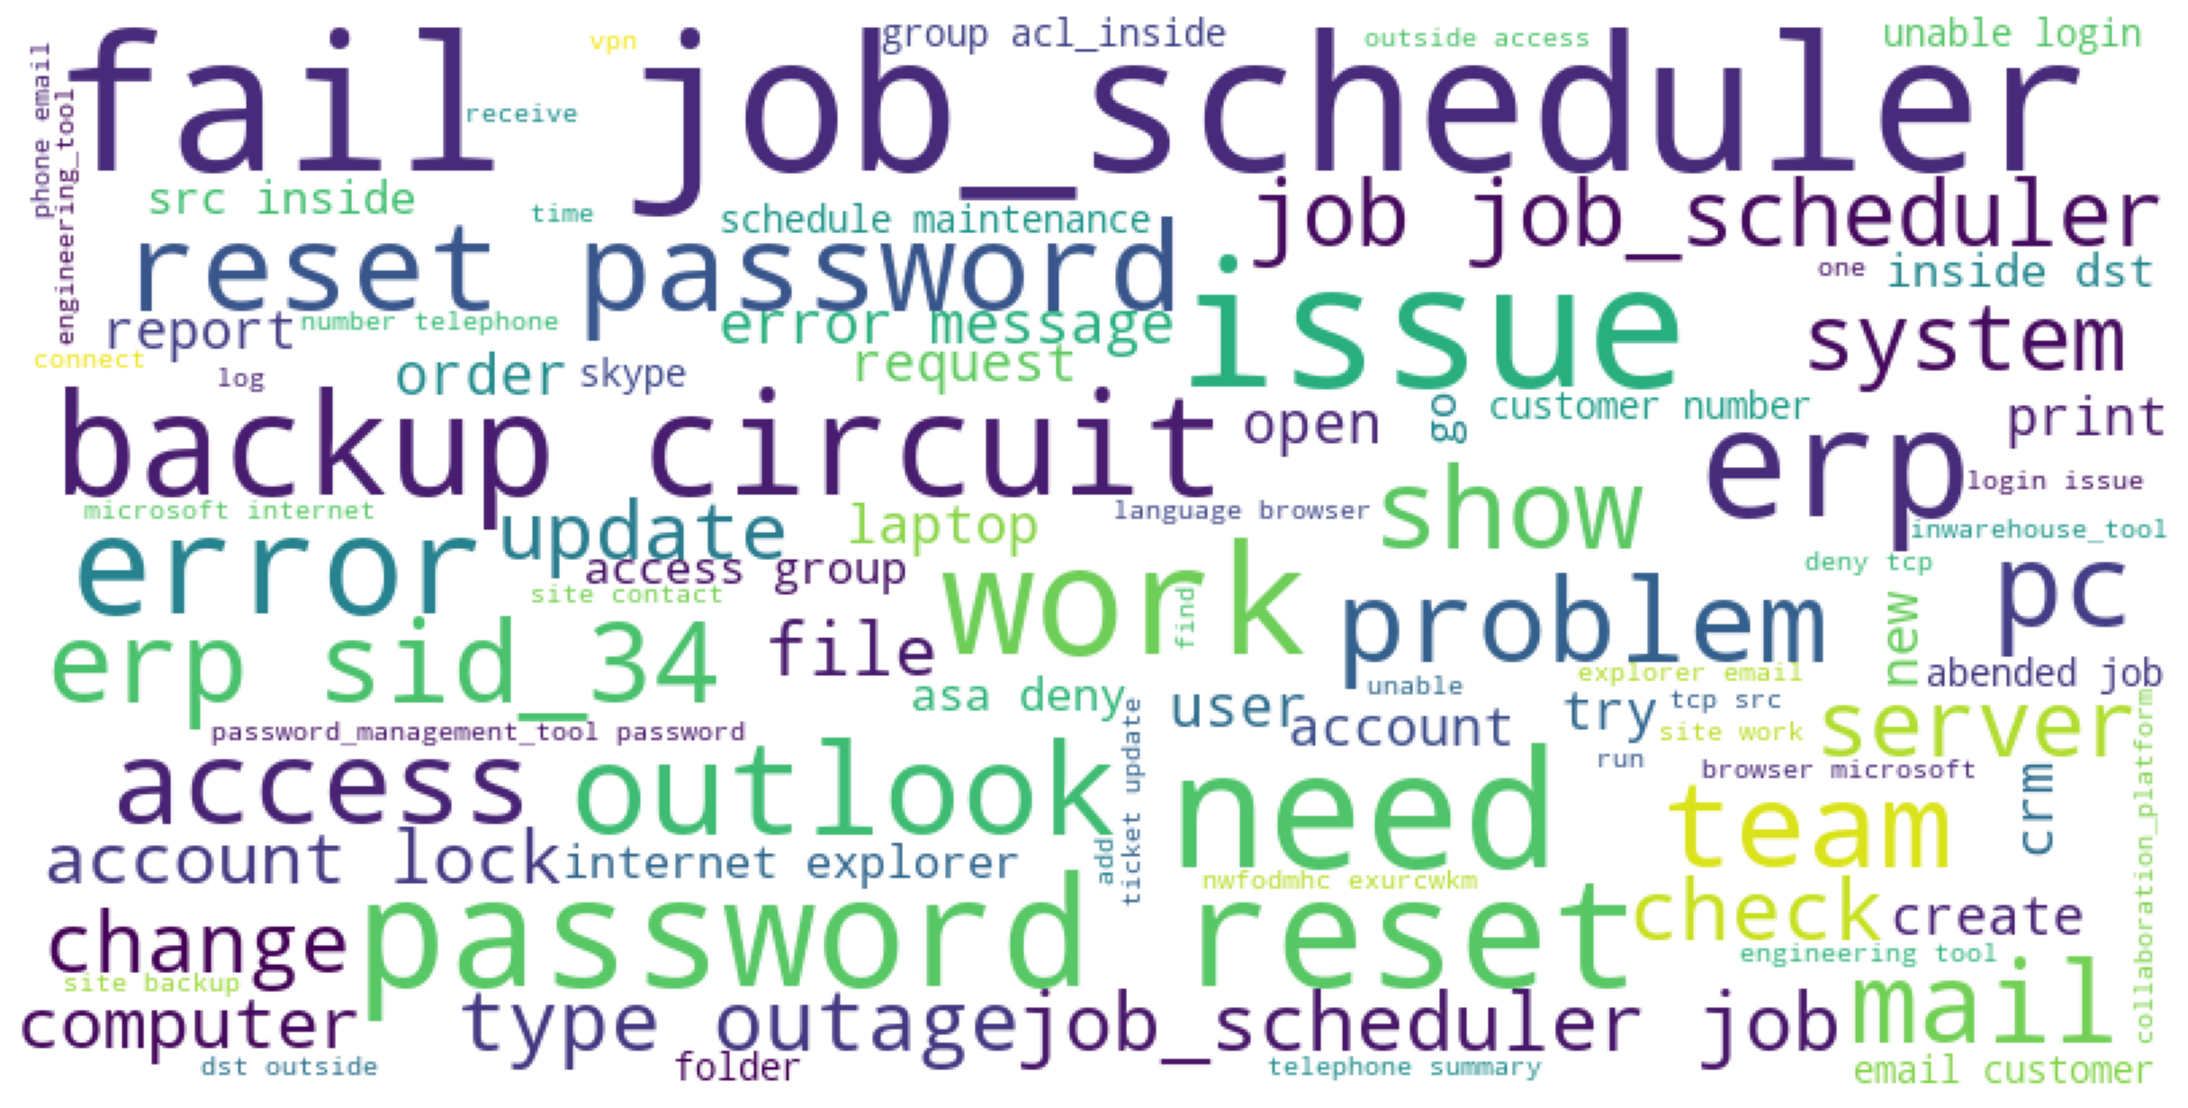

In [ ]:
plot_word_cloud(' '.join(ticket_data['Updated_translation']))

Word cloud for the Updated_translation column (processed short description and description) for GRP_0

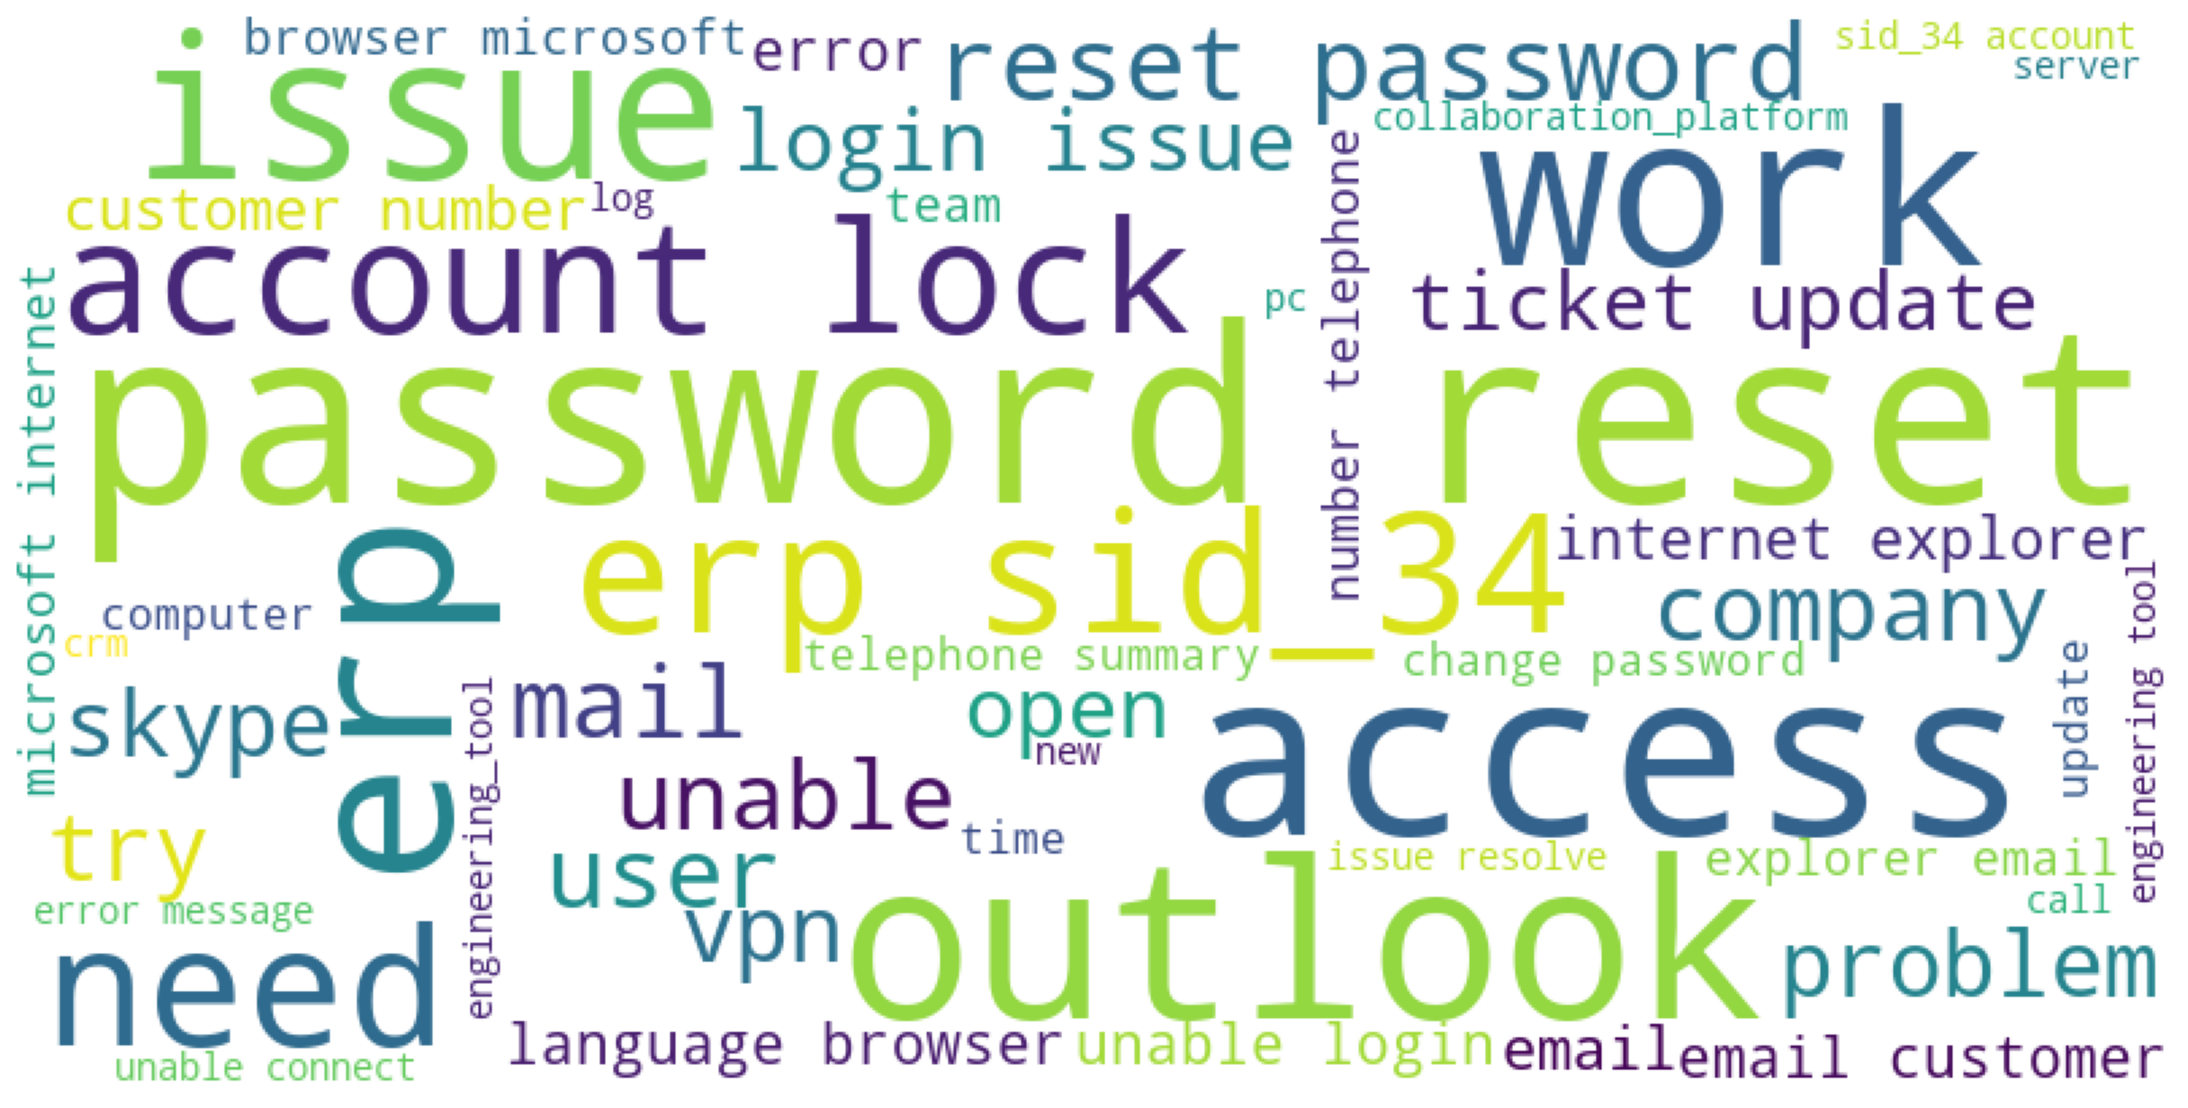

In [ ]:
# Word Cloud for all tickets assigned to GRP_0
plot_word_cloud(' '.join(ticket_data[ticket_data['Assignment group'] == 'GRP_0']['Updated_translation']))

Word cloud for the Updated_translation column (processed short description and description) for the groups that has less than 30 tickets assigned

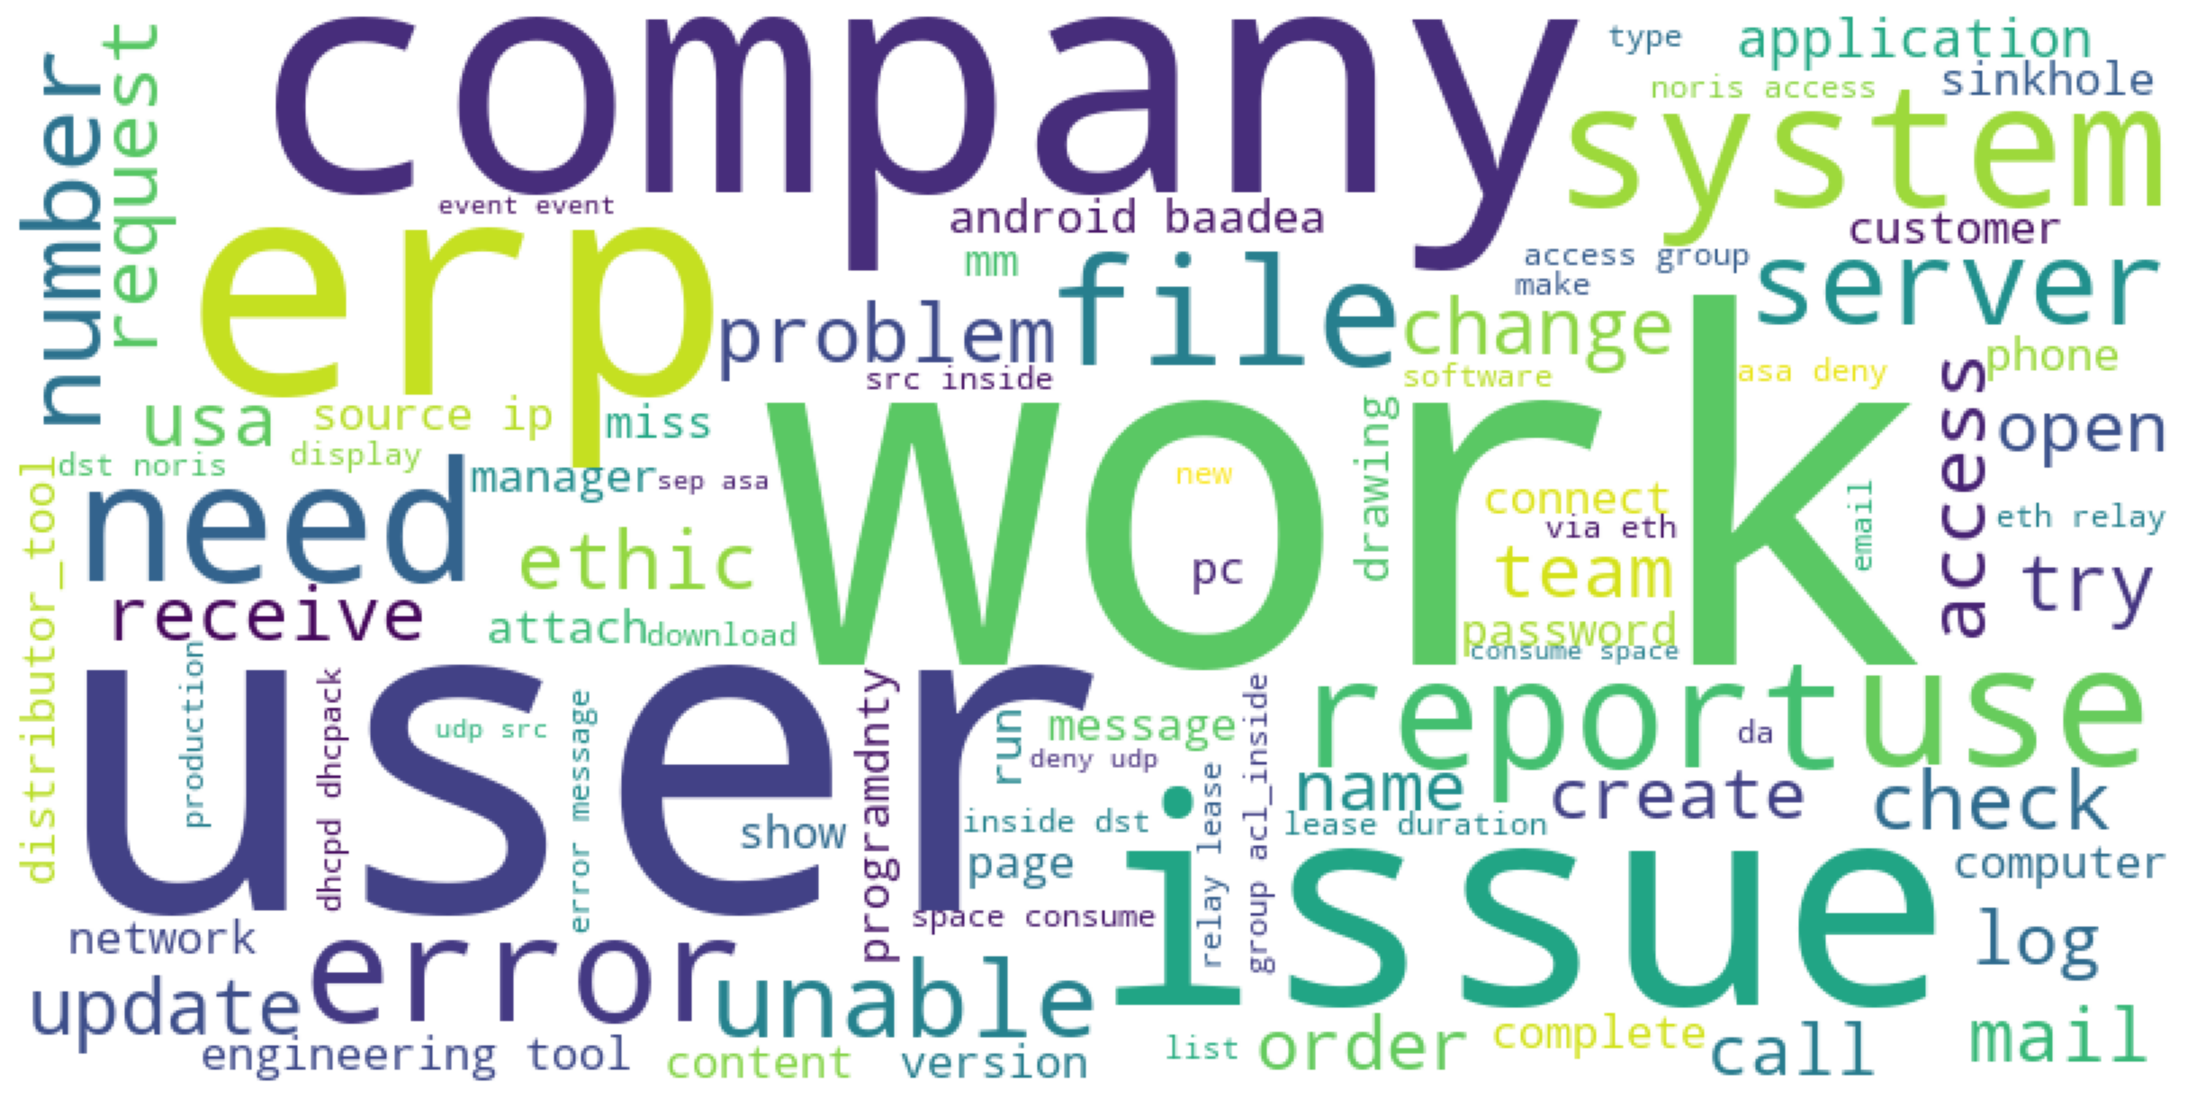

In [ ]:
plot_word_cloud(' '.join(others_group['Updated_translation']))

N Gram Analysis

N-gram is a contiguous sequence of N items from a given sample of text or speech, in the fields of computational linguistics and probability. The items can be phonemes, syllables, letters, words or base pairs according to the application. N-grams are used to describe the number of words used as observation points, e.g., unigram means singly-worded, bigram means 2-worded phrase, and trigram means 3-worded phrase.
We'll be using scikit-learn’s CountVectorizer function to derive n-grams 

In [ ]:
def get_top_n_ngrams(corpus, top_n=None, ngram_range=(1,1)):
    #vec = CountVectorizer(ngram_range=ngram_range,stop_words=x_stopwords).fit(corpus)
    vec = CountVectorizer(ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:top_n]

Identifying the top 50 unigrams in the dataset

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
top_n = 50
ngram_range = (1,1)
uni_grams = get_top_n_ngrams(ticket_data['Updated_translation'], top_n, ngram_range)
unigram_df = pd.DataFrame(uni_grams, columns = ['Unigrams' , 'count'])

Visualizing the top 50 unigrams

In [ ]:
hv.extension('bokeh')
hv.Bars(unigram_df).opts(title="Top 50 unigrams", color="#edea1a", xlabel="Unigrams", ylabel="count")\
                .opts(opts.Bars(width=1000, height=400,tools=['hover'],show_grid=True,xrotation=90))

Identifying the top 50 unigrams in GRP_0

In [ ]:
top_n = 50
ngram_range = (1,1)
uni_grams_0 = get_top_n_ngrams(ticket_data[ticket_data['Assignment group'] != 'GRP_0']['Updated_translation'], top_n, ngram_range)
unigram_0_df = pd.DataFrame(uni_grams_0, columns = ['Unigrams' , 'count'])

Visualizing the top 50 unigrams in the group GRP_0

In [ ]:
hv.extension('bokeh')
hv.Bars(unigram_0_df).opts(title="Top 50 unigrams from all groups except GRP_0", color="#a3de0d", xlabel="Unigrams", ylabel="count")\
                .opts(opts.Bars(width=1000, height=400,tools=['hover'],show_grid=True,xrotation=90))

Identifying the top 50 Bi Grams

In [ ]:
top_n = 50
ngram_range = (2,2)
bi_grams = get_top_n_ngrams(ticket_data['Updated_translation'], top_n, ngram_range)
bi_grams_df = pd.DataFrame(bi_grams, columns = ['Bigrams' , 'count'])

Visualizing the top 50 Bi Grams

In [ ]:
hv.extension('bokeh')
hv.Bars(bi_grams_df).opts(title="Top 50 bigrams", color="#0dde1b", xlabel="Bigrams", ylabel="count")\
                .opts(opts.Bars(width=1000, height=400,tools=['hover'],show_grid=True,xrotation=90))

Identifying the top 50 Tri Grams

In [ ]:
top_n = 50
ngram_range = (3,3)
tri_grams = get_top_n_ngrams(ticket_data['Updated_translation'], top_n, ngram_range)
tri_grams_df = pd.DataFrame(tri_grams, columns = ['Trigrams' , 'count'])

Visualizing the top 50 Tri Grams

In [ ]:
hv.extension('bokeh')
hv.Bars(tri_grams_df).opts(title="Top 50 Trigrams", color="#0ddec9", xlabel="Trigrams", ylabel="count")\
                .opts(opts.Bars(width=1000, height=500,tools=['hover'],show_grid=True,xrotation=90))

Saving the pre processed data to file

In [ ]:
ticket_data.to_csv('/content/drive/MyDrive/Projects/Capstone/data/processed/pre_processed_ticket_data.csv')

In [ ]:
with open('/content/drive/MyDrive/Projects/Capstone/data/pickles/pre_processed_ticket_data.pkl','wb') as f:
    pickle.dump(ticket_data, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
ticket_data.head()

,Short description,Description,Caller,Assignment group,Combined_Description,word_count,lang_detected,translated_description,Updated_translation
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue. -verified user details.(employee#...,23,en,login issue. -verified user details.(employee#...,login issue verify user detail employee manage...
1,outlook,"hello team, my meetings/skype meetings etc ar...",hmjdrvpb komuaywn,GRP_0,"outlook. hello team, my meetings/skype meetin...",12,en,"outlook. hello team, my meetings/skype meetin...",outlook team meeting skype meeting appear outl...
2,cant log in to vpn,hi i cannot log on to vpn best,eylqgodm ybqkwiam,GRP_0,cant log in to vpn. hi i cannot log on to vpn...,4,en,cant log in to vpn. hi i cannot log on to vpn...,log vpn log vpn
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page,4,en,unable to access hr_tool page,unable access hr_tool page
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error,2,en,skype error,skype error


Creating a new dataframe with only the relevant information 

In [ ]:
processed_ticket_data= ticket_data[['Updated_translation','Assignment group']]

In [ ]:
processed_ticket_data.head()

,Updated_translation,Assignment group
0,login issue verify user detail employee manage...,GRP_0
1,outlook team meeting skype meeting appear outl...,GRP_0
2,log vpn log vpn,GRP_0
3,unable access hr_tool page,GRP_0
4,skype error,GRP_0


Saving the processed data relevant for model building to file (both as csv and as a pickle file)

In [ ]:
processed_ticket_data.to_csv('/content/drive/MyDrive/Projects/Capstone/data/processed/processed_ticket_data.csv')

In [ ]:
with open('/content/drive/MyDrive/Projects/Capstone/data/pickles/processed_ticket_data.pkl','wb') as f:
    pickle.dump(processed_ticket_data, f, pickle.HIGHEST_PROTOCOL)